In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pandas

## Задача

Дан датасет по заболеваемости коронавирусом с такими колонками: `date`, `continent`, `new_cases`.

In [2]:
df = pd.read_csv('../data/covid-19cases.csv', index_col=0)
df = df[df['date'] != 'For Notes: ']
df = df[['date', 'continent', 'new_cases']]
df = df.dropna()
df

,date,continent,new_cases
0,13-03-20,North America,2.0
4,20-03-20,North America,2.0
12,24-03-20,North America,8.0
14,25-03-20,North America,5.0
16,26-03-20,North America,2.0
...,...,...,...
104530,23-10-20,Africa,27.0
104532,24-10-20,Africa,15.0
104534,25-10-20,Africa,12.0
104536,26-10-20,Africa,7.0


### Задача 1

Посчитать сколько людей суммарно заболело на каждом континенте.

In [3]:
df.groupby('continent').sum()

,new_cases
continent,
Africa,1729711.0
Asia,13279735.0
Europe,8621693.0
North America,10528425.0
Oceania,40052.0
South America,9396228.0


### Задача 2

Посчитать корреляцию между заболеваниями на разных континентах.

Корреляцию можно посчитать при помощи some_df.corr(), но тогда в индексе должны быть даты, а в колонках названия континентов.

In [4]:
df_needed_format = pd.pivot_table(df, index='date', columns='continent', values='new_cases')
df_needed_format.corr() # Таблица с корреляциями

continent,Africa,Asia,Europe,North America,Oceania,South America
continent,,,,,,
Africa,1.000000,0.705671,0.284256,0.886212,0.448894,0.855486
Asia,0.705671,1.000000,0.551060,0.788940,0.381445,0.861818
Europe,0.284256,0.551060,1.000000,0.532961,0.239030,0.335774
North America,0.886212,0.788940,0.532961,1.000000,0.511917,0.849875
Oceania,0.448894,0.381445,0.239030,0.511917,1.000000,0.419009
South America,0.855486,0.861818,0.335774,0.849875,0.419009,1.000000


## Задача по игре престолов

Есть открытый API по вселенной Игры Престолов - https://anapioficeandfire.com/

Порешаем задачи с ним.

In [5]:
import requests

response = requests.get('https://anapioficeandfire.com/api/books?pageSize=50')
df = pd.DataFrame(response.json())
df = df[['name', 'characters']]
df.head()

,name,characters
0,A Game of Thrones,[https://anapioficeandfire.com/api/characters/...
1,A Clash of Kings,[https://anapioficeandfire.com/api/characters/...
2,A Storm of Swords,[https://anapioficeandfire.com/api/characters/...
3,The Hedge Knight,[https://anapioficeandfire.com/api/characters/...
4,A Feast for Crows,[https://anapioficeandfire.com/api/characters/...


In [6]:
df.iloc[5].characters[:5] #список значений

['https://anapioficeandfire.com/api/characters/8',
 'https://anapioficeandfire.com/api/characters/32',
 'https://anapioficeandfire.com/api/characters/35',
 'https://anapioficeandfire.com/api/characters/38',
 'https://anapioficeandfire.com/api/characters/46']

In [7]:
# Делаем explode и оставляем только те колонки, которые понадобятся далее
# Обращаю внимание - после explode желательно делать ресет индекса, потому что индекс останется старым (см. пример с explode)
exploded_df = df.explode('characters').reset_index(drop=True)

# Группируем по id персонажа и считаем сколько раз персонаж встречается
char_freq_df = exploded_df.groupby('characters').count().reset_index()
char_freq_df.head()

,characters,name
0,https://anapioficeandfire.com/api/characters/1,1
1,https://anapioficeandfire.com/api/characters/10,1
2,https://anapioficeandfire.com/api/characters/100,3
3,https://anapioficeandfire.com/api/characters/1000,3
4,https://anapioficeandfire.com/api/characters/1001,1


Чтобы найти персонажа, который участвовал максимальное количество раз, профильтруем датафрейм по максимальному значению.

In [9]:
char_freq_df[char_freq_df['name'] == char_freq_df['name'].max()]

,characters,name
1442,https://anapioficeandfire.com/api/characters/38,10


Далее, чтобы узнать что это за персонаж, достаточно перейти по ссылке и посмотреть json.

# Matplotlib

## Задание - нарисовать $n$ линий

Написать функцию, которая на вход принимает параметр $n$ и рисует $n$ графиков по такому приципу:

$$y = x$$
$$y = 2x$$
$$y = 3x$$
$$...$$
$$y = nx$$

In [27]:
def draw_lines(n):
    x = np.linspace(-5, 5, 100)
    for i in range(n):
        plt.plot(x, i * x)

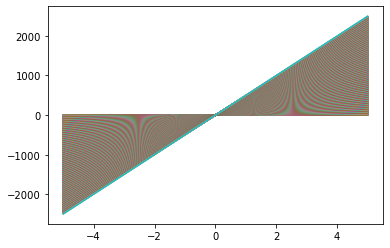

In [28]:
draw_lines(500)

## Задача

По заданным точкам нарисовать квадрат.



In [29]:
square_coord = [
    (0, 0),
    (1, 0),
    (1, 1),
    (0, 1)
]

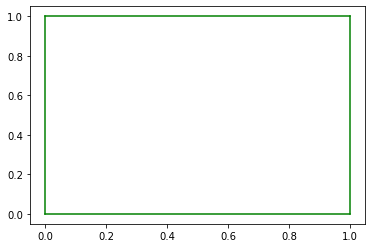

In [30]:
for i in range(len(square_coord)):
    x1, y1 = square_coord[i - 1]
    x2, y2 = square_coord[i]
    plt.plot([x1, x2], [y1, y2], color='g')

Можно оформить код в функцию и он будет рисовать любую замкнутую фигуру

In [31]:
def draw_figure(coords):
    for i in range(len(coords)):
        x1, y1 = coords[i - 1]
        x2, y2 = coords[i]
        plt.plot([x1, x2], [y1, y2], color='g')

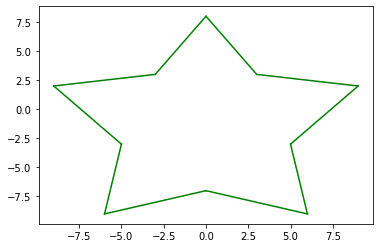

In [32]:
star_coords = [
    (-9, 2),
    (-3, 3),
    (0, 8),
    (3, 3), 
    (9, 2),
    (5, -3),
    (6, -9),
    (0, -7),
    (-6, -9),
    (-5, -3)
]
draw_figure(star_coords)

## Задача

Дана СЛАУ второго порядка, нужно отобразить на графике линии и точку их пересечения

$$a_{11}x + a_{12}y = b_1$$
$$a_{21}x + a_{22}y = b_2$$



## Решение

Мы можем нарисовать линию такого вида:

$y = kx + b$

Для этого можем привести каждое из уравнений выше к такому виду:

$y = \frac{(b_1 - a_{11}x)}{a_{12}}$

$y = \frac{(b_2 - a_{21}x)}{a_{22}}$

Чтобы использовать эти формулы, нужно чтобы коэфициенты $a_{12}, a_{22}$ были не равны 0 (на 0 делить нельзя).

Как будет выглядеть уравнение, если обнулить коэфициенты?

$a_{11}x = b1$

$a_{21}x = b2$

В таком случае графики будут вертикальными линиями с иксами $\frac{b1}{a_{11}}$ и $\frac{a_{21}}{b2}$

Можно писать код. Сначала напишем функцию, которая принимает на вход строку из матрицы (массив $[a_{11}, a_{12}]$, например), а также значение $b$. 

In [33]:
A = np.array([[1, 0], [0, 1]])
b = np.array([3, 2])

solution = np.linalg.solve(A, b)
solution

array([3., 2.])

In [34]:
def draw_line(a_row, b):
    # Будем рисовать от -50 до 50
    x = np.linspace(-50, 50, 100)
    if a_row[1] == 0:
        # Если коэфициент 0, рисуем вертикальную линию от -50 до 50
        y = [-50, 50]
        x_value = b / a_row[0]
        x = [x_value, x_value]
    else:
        # Если не 0, то используем обычную формулу
        y = (b - a_row[0] * x) / a_row[1]
    plt.plot(x, y)

Будем передавать сначала первую строку:

In [35]:
A[0, :]

array([1, 0])

Затем вторую:

In [36]:
A[1, :]

array([0, 1])

Получим вот такие линии:

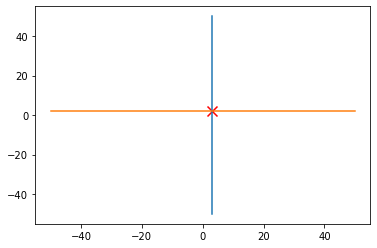

In [37]:
draw_line(A[0, :], b[0])
draw_line(A[1, :], b[1])

# Нарисуем также точку пересечения
plt.scatter([solution[0]], [solution[1]], marker='x', s=100, c='r')

Можем оформить итоговое решение в функцию, которая будет принимать массивы A и b и рисовать по ним график

In [38]:
def draw_linear_solution(A, b):
    solution = np.linalg.solve(A, b)
    draw_line(A[0, :], b[0])
    draw_line(A[1, :], b[1])

    # Нарисуем также точку пересечения
    plt.scatter([solution[0]], [solution[1]], marker='x', s=100, c='r')

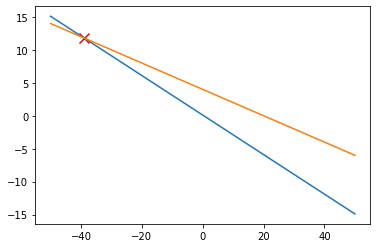

In [39]:
A = np.array([[3, 10], [1, 5]])
b = np.array([1, 20])
draw_linear_solution(A, b)

Добавим слайдер

Для этого необходимо установить `ipywidgets`:

```
conda install ipywidgets
```

In [40]:
%matplotlib inline
from ipywidgets import interact
import ipywidgets as widgets

Если посмотреть примеры, то на вход функции должны поступать числа. Напишем функцию, которая будет принимать на вход числа, преобразовывать их в матрицу и передавать в функцию, которую мы написали раньше.

In [41]:
def draw_linear_from_numbers(a11, a12, a21, a22, b1, b2):
    A = np.array([[a11, a12], [a21, a22]])
    b = np.array([b1, b2])
    draw_linear_solution(A, b)
    # Для красоты зафиксируем положение графика
    plt.xlim(-50, 50)
    plt.ylim(-50, 50)

Создаем слайдеры

In [42]:
slider1 = widgets.FloatSlider(value=1, min=-5, max=5, step=0.01)
slider2 = widgets.FloatSlider(value=0, min=-5, max=5, step=0.01)
slider3 = widgets.FloatSlider(value=0, min=-5, max=5, step=0.01)
slider4 = widgets.FloatSlider(value=1, min=-5, max=5, step=0.01)
slider5 = widgets.FloatSlider(value=3, min=-5, max=5, step=0.01)
slider6 = widgets.FloatSlider(value=2, min=-5, max=5, step=0.01)

Передаем в функцию `interact` нашу функцию и какие слайдеры будут отвечать за какие аргументы

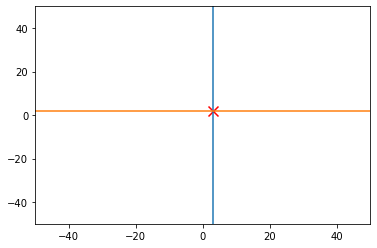

<function __main__.draw_linear_from_numbers(a11, a12, a21, a22, b1, b2)>

In [ ]:
interact(draw_linear_from_numbers, a11=slider1, a12=slider2, a21=slider3, a22=slider4, b1=slider5, b2=slider6)